# Creating a Lexical Dispersion Plot

Given a piece of text, and a list of words, a lexical dispersion plot locates the occurrence of each of the words in the text.

In [1]:
# Import modules

import cltk
from nltk.tokenize import word_tokenize 
from cltk.tokenize.word import WordTokenizer
from cltk.tokenize.indian_tokenizer import indian_punctuation_tokenize_regex as i_word
import matplotlib.pyplot as plt

## Parameters 

We will define a function by the name of `dispersionPlot` taking three parameters, `text`, `words`, and `lang`:

* `text`, a string: the text based on which the lexical distribution plot is to be drawn
* `words`, a list of string: a list of words, whose distribution across the text is to be plotted
* `lang`, a string: the ISO 639-1 code of the language of the text

The function returns void, and prints the plot.

In [2]:
def dispersionPlot(text, words, lang):
    languages = ["en","bn","hi","la","sa"]
    """
    en:English
    bn:Bengali
    hi:Hindi
    la:Latin
    sa:Sanskrit
    """
    if lang in languages:
        if lang in ["en","la"]:
            tokens = word_tokenize(text.lower())
            for i in range(0,len(words)):
                words[i] = words[i].lower()
        if lang in ["bn","hi","sa"]:
            tokens= i_word(text)
    
    # Locating the matches of the words in the text.    
        x_length = len(tokens)
        y_length = len(words)
        x_list = []
        y_list = []
        for i in range(0,x_length):
            for j in range(0,y_length):
                if tokens[i]==words[j]:
                    x_list.append(i+1)
                    y_list.append(j)
    
    #Creation of Dispersion Plot with Matplotlib's pyplot.         
        plt.plot(x_list, y_list, "b|", scalex=.1)
        plt.yticks(list(range(len(words))), words, color="b")
        plt.ylim(-1, len(words))
        plt.xlabel("Lexical Distribution")
        plt.show()
            
    else:
        print("Language not presently covered by CLTK or wrong language code") 
        


## Explanation 

### Tokenisation
Firstly, we check which language the function is present in. Then we try to sort them accordingly, sending the Indian ones one way, and English and Latin the other. Both these groups have been assigned their own separate tokenizer. We use the CLTK Indian tokenizer for Indian languages and the NLTK `word_tokenize` method for the other two languages.

### Locating Matches and Plotting
This is a pretty straightforward task where we select matches from the text and store their positions in the text in order to display them on the graph. This is achieved using simple loops. It is followed by basic plotting and manipulating data points to produce the lexical dispersion plot.

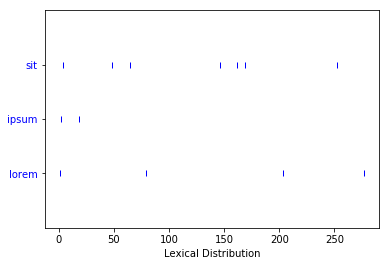

In [3]:
# Test the function

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Cras at maximus dui. Sed mauris ipsum, gravida id velit at, lobortis aliquam magna. Nam feugiat nibh eget cursus rutrum. Fusce eu euismod turpis, in posuere elit. In pellentesque massa sit amet sem posuere, vel viverra justo suscipit. Aenean nibh sem, imperdiet nec sem sit amet, maximus euismod velit. Ut vitae ex mauris. Donec laoreet lorem at diam viverra dapibus. Suspendisse elementum rhoncus commodo. Donec massa purus, dignissim maximus laoreet in, pharetra euismod nulla.Nunc eu libero lacus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Morbi eget tincidunt velit. Curabitur a libero vel felis maximus ultrices. Donec porta fringilla purus eget porttitor. In cursus lobortis sapien, sit amet euismod eros semper quis. Fusce luctus eleifend neque, gravida mollis massa fringilla sit amet. Nunc placerat, purus sit amet maximus sollicitudin, sapien sem suscipit elit, non aliquet nunc nisl in arcu.Quisque eu nisi interdum, pretium elit vel, dignissim est. Ut lobortis vehicula lectus, imperdiet tristique lorem pulvinar at. Phasellus leo justo, tempor at maximus a, vehicula et urna. Nunc blandit eros in dui venenatis placerat. Maecenas vehicula neque orci, at tempor elit vehicula et. Integer elementum, diam nec mattis porttitor, risus nibh vehicula quam, sit amet pellentesque quam ante commodo orci. Etiam sed dignissim tellus. Cras non ultrices velit, eget egestas justo. Ut rutrum condimentum lorem, ut auctor massa dictum eu. Morbi dictum eget eros sed varius. Nunc tristique mollis fermentum. Donec vel odio gravida, fringilla ante a, volutpat dolor. Vestibulum facilisis dictum magna id aliquam. Etiam ex ex, ultricies a dignissim vitae, sollicitudin nec orci. Nam eu augue et libero porttitor maximus volutpat a risus. Suspendisse eget mauris et mi tincidunt suscipit."
words = ["Lorem", "ipsum", "sit"]
dispersionPlot(text, words, "la")